# Donation Analysis
- We are going to run an analysis of the data collected from donations made from donors in 2008
- From the analysis we would be able to view the following
- A high-level snapshot of the donors key metrics, presented in a table format
- A graphical analysis of the data

# Import necessary libraries dependencies

In [1]:
# Dependencies - Files to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
donors_df = pd.read_csv("Resources/donors2008.csv")

# Statistical Overview of DataFrame

In [2]:
# Display a statistical overview of the dataframe
donors_df.describe().round(2)

,Amount
count,1776.00
mean,659.31
std,1274.42
min,5.00
25%,200.00
50%,250.00
75%,500.00
max,5000.00


In [3]:
# Display the number of rows and columns, the data type of each column, the number of non-NaN elements, and the total memory usage.
donors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LastName   1776 non-null   object 
 1   FirstName  1776 non-null   object 
 2   Employer   1743 non-null   object 
 3   City       1776 non-null   object 
 4   State      1776 non-null   object 
 5   Zip        1776 non-null   object 
 6   Amount     1776 non-null   float64
dtypes: float64(1), object(6)
memory usage: 97.2+ KB


# Cleaning Data
- Determine if there is any missing values
- Drop rows of NAN

In [4]:
# Determine if there are any missing values
donors_df.count()

LastName     1776
FirstName    1776
Employer     1743
City         1776
State        1776
Zip          1776
Amount       1776
dtype: int64

In [5]:
# Drop missing values
donors_df = donors_df.dropna(how='any')

# Cleaning Names and Replacing Substrings in a Python String
- Prefixes: "Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss"
- Suffixes: " MD", " DDS", " DVM", " PhD"

In [6]:
# Add prefix to remove it from list
prefixes = ["Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss "]

# Iterate through the words in the prefix list and replace them with an empty space,""
for word in prefixes:
    donors_df['FirstName']= donors_df['FirstName'].str.replace(word,"")            

In [7]:
# Add suffix to remove it from list
suffixes =[" MD", " DDS", " DVM", " PhD"]

# Iterate through the words in the prefix list and replace them with an empty space,""
for word in suffixes:
    donors_df['LastName'] = donors_df["LastName"].str.replace(word,"")

In [8]:
# Cleanup and rename columns names to more explanatory names using a ditionary
donors_df = donors_df.rename(columns={"LastName": 'Last Name,',"FirstName": 'First Name'})
donors_df.head()

,"Last Name,",First Name,Employer,City,State,Zip,Amount
0,Aaron,Eugene,State Department,Dulles,VA,20189,500.0
1,Abadi,Barbara,Abadi & Co.,New York,NY,10021,200.0
2,Adamany,Anthony,Retired,Rockford,IL,61103,500.0
3,Adams,Lorraine,Self,New York,NY,10026,200.0
4,Adams,Marion,None,Exeter,NH,3833,100.0


# Determinie data in Rows and Columns

In [9]:
# Display the 1st, 9th, 49, and 99th row information
# Display rows 0 to 3
test1=donors_df.loc[[0,8,48,98]]
test2=donors_df.loc[0:3]
print(test1)
print(test2)

   Last Name, First Name            Employer           City State    Zip  \
0       Aaron     Eugene    State Department         Dulles    VA  20189   
8       Adida        Ben  Harvard University  Mountain View    CA  94043   
48     Arnold       Marc                Self       Longmont    CO  80503   
98     Baruch        Ann                None      Haverford    PA  19041   

    Amount  
0    500.0  
8    200.0  
48   200.0  
98   500.0  
  Last Name, First Name          Employer      City State    Zip  Amount
0      Aaron     Eugene  State Department    Dulles    VA  20189   500.0
1      Abadi    Barbara       Abadi & Co.  New York    NY  10021   200.0
2    Adamany    Anthony           Retired  Rockford    IL  61103   500.0
3      Adams   Lorraine              Self  New York    NY  10026   200.0


In [10]:
# test1- sort dataframe based on a column value['amount'] lowest to highest (ASC)
test1 = donors_df.sort_values(by='Amount', ascending=True).head(10)
print(test1)

     Last Name, First Name                         Employer           City  \
823     Kaufman    Harriet                             Self       New York   
321      Corroo   Mary Coe                        Bob Evans     Cape Coral   
1211     Parker       Lisa  Lawrence Welk Family Foundation   Santa Monica   
448       Emery    Deborah          Califronia Men's Colony  Arroyo Grande   
1336      Rolls     Harold                             None     Fort Plain   
562       Gibbs      Vicki                             Self      Roseville   
1775    Zyskind        Jon                     JDS Uniphase        Concord   
1126    Naegele     Cushla                   VOS Selections       New York   
1197      Paley   Patricia      NYC Department of Education       Brooklyn   
1218   Pawlenko    Natalie                           NJDHSS      Princeton   

     State         Zip  Amount  
823     NY       10003     5.0  
321     FL       33990     5.0  
1211    CA       90404    10.0  
448     C

In [11]:
# Display the data from the 2nd, 4th, and 6th columns showing rows 1,3 and 4
donors_df.loc[[1,3,4],["First Name","City","Zip"]]

,First Name,City,Zip
1,Barbara,New York,10021
3,Lorraine,New York,10026
4,Marion,Exeter,3833


In [12]:
# Print the data from the the first column
donors_df.iloc[:,0].head()

0      Aaron
1      Abadi
2    Adamany
3      Adams
4      Adams
Name: Last Name,, dtype: object

In [13]:
# Print data from the first three coluns showing last five rows
donors_df.iloc[:, 0:3].tail()

,"Last Name,",First Name,Employer
1769,Zeluf,Craig,TD Ameritrade
1770,Zimmer,Charles,RZO LLC / QED Productions
1771,Zinczenko,David,Rodale
1774,Zwerdling,David,"Montg Cnty, Md"
1775,Zyskind,Jon,JDS Uniphase


In [14]:
# Print data from the first three coluns showing last five rows
donors_df.iloc[:, 1].head()

0      Eugene
1     Barbara
2     Anthony
3    Lorraine
4      Marion
Name: First Name, dtype: object

In [15]:
# Print row 1 and row 3 with all columns
donors_df.iloc[[1,3], :]

,"Last Name,",First Name,Employer,City,State,Zip,Amount
1,Abadi,Barbara,Abadi & Co.,New York,NY,10021,200.0
3,Adams,Lorraine,Self,New York,NY,10026,200.0


In [16]:
# Display the name 'Lorraine (4th row second column)
donors_df.iloc[3,1]

'Lorraine'

# Donors Donation Summary
- Donations by city [New York]
- Donations by state [Maryland, MD]
- Donation over $1,000.00
- Maximum & Minimum values donated by state
- Mean(average) donation by state

In [17]:
# Display the First Name of the donors from New York(five rows only)
donors_df.loc[donors_df["City"]=='New York',["First Name"]].head()

,First Name
1,Barbara
3,Lorraine
16,Carolyn
30,Razi
42,Alexandros


In [18]:
# Display donors from the state of Maryland (MD)
donors_df.loc[donors_df["State"]== "MD",["First Name"]].head()

,First Name
7,Clifford
20,Bruce
40,Mahlon
62,Margaret
69,Sandra


In [19]:
# display donors who donated $1000 or more (first 5)
donors_df.loc[donors_df['Amount']>= 1000,['First Name']].head()

,First Name
9,Michael M.
11,Alexander
15,Ben
25,Ralph
27,Jeremy


In [20]:
# What is the minimum and maximum amount donated by each state(show five and dollar value)
min_df=donors_df.groupby('State')['Amount'].min().map("${:,.2f}".format).head()
max_df=donors_df.groupby('State')['Amount'].max().map("${:,.2f}".format).head()
print(min_df)
print(max_df)

State
AE    $100.00
AK     $50.00
AL     $50.00
AP    $200.00
AR    $100.00
Name: Amount, dtype: object
State
AE      $100.00
AK      $500.00
AL      $500.00
AP      $200.00
AR    $1,000.00
Name: Amount, dtype: object


In [21]:
# What is the average donation amount per state (show ten and dollar value)
donors_df.groupby("State")["Amount"].mean().map("${:,.2f}".format).head(10)

State
AE    $100.00
AK    $175.00
AL    $212.50
AP    $200.00
AR    $350.00
AZ    $206.00
CA    $692.23
CO    $851.25
CT    $825.71
DC    $647.12
Name: Amount, dtype: object

# Donors Percentage Summary
- States Donation Percentage
- Cities Donation Percentage
- Average Donation by State 

In [22]:
# Get the percentage donation value for state
# Get the percentage donation value for city

# First calculate the total amount for each state and then each city
# then  divide it by the total amount of donation collected and * 100
pcnt_state = donors_df.groupby("State")['Amount'].sum()
pcnt_city = donors_df.groupby("City")["Amount"].sum()
donors_total = donors_df['Amount'].sum()

In [23]:
percentage_state = pcnt_state/ float(donors_total) * 100
percentage_city = pcnt_city/ float(donors_total) * 100

In [24]:
# Average Donations by State
# Average Donations by City
avg_state = donors_df.groupby("State")["Amount"].mean()
avg_city = donors_df.groupby("City")["Amount"].mean()

# Graphical Summary
- Percentage of Donation by State
- Average Donaton by State 
- Maxiumum Donations by State
- Minimum Donations by State

State
AE     0.008963
AK     0.094108
AL     0.152366
AP     0.017925
AR     0.156847
AZ     0.461578
CA    22.397384
CO     3.051793
CT     2.590215
DC     3.015943
Name: Amount, dtype: float64

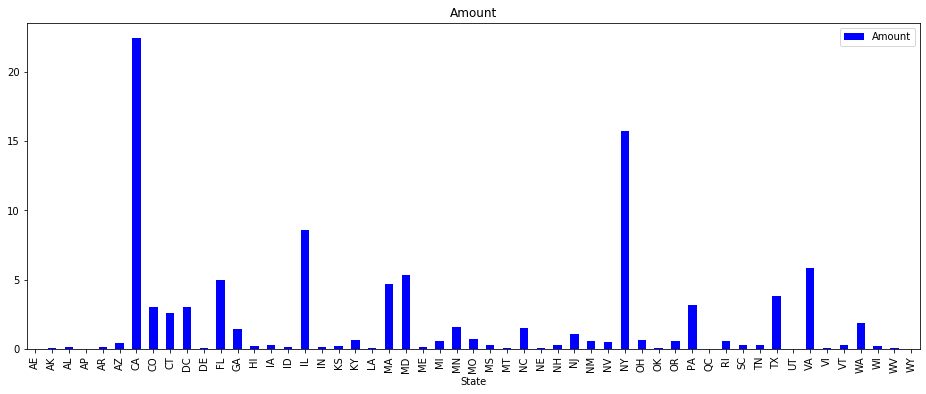

In [25]:
# Percentage of donations by state
percentage_state.plot(kind='bar',subplots=True, color='blue',figsize=(16, 6)); plt.legend()
percentage_state.head(10)

State
AE    100.000000
AK    175.000000
AL    212.500000
AP    200.000000
AR    350.000000
AZ    206.000000
CA    692.232687
CO    851.250000
CT    825.714286
DC    647.115385
Name: Amount, dtype: float64

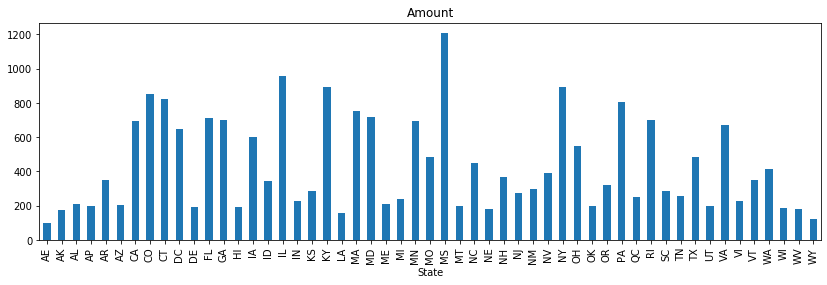

In [26]:
# Average donations by state
avg_state.plot(kind='bar',subplots=True,figsize=(14,4))
avg_state.head(10)

In [27]:
# Maximun donations by state
max_df=donors_df.groupby('State')['Amount'].max()
max_df.head(10)

State
AE     100.0
AK     500.0
AL     500.0
AP     200.0
AR    1000.0
AZ     500.0
CA    5000.0
CO    5000.0
CT    5000.0
DC    5000.0
Name: Amount, dtype: float64

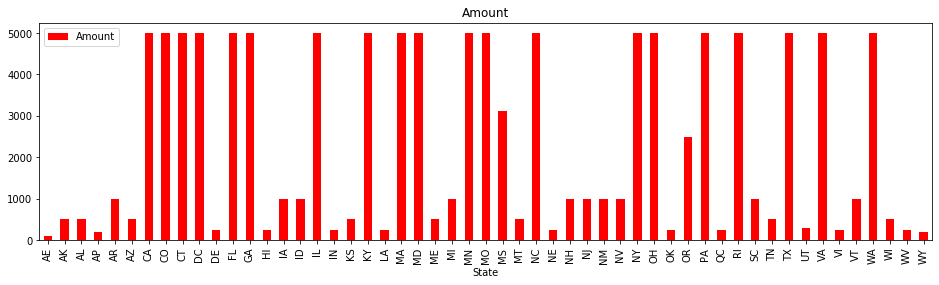

In [28]:
max_df.plot(kind='bar',subplots=True, color='red',figsize=(16, 4)); plt.legend()

In [29]:
# Minimum donations by state
min_df=donors_df.groupby('State')['Amount'].min()
min_df.head(10)

State
AE    100.0
AK     50.0
AL     50.0
AP    200.0
AR    100.0
AZ     25.0
CA     10.0
CO     50.0
CT     25.0
DC     25.0
Name: Amount, dtype: float64

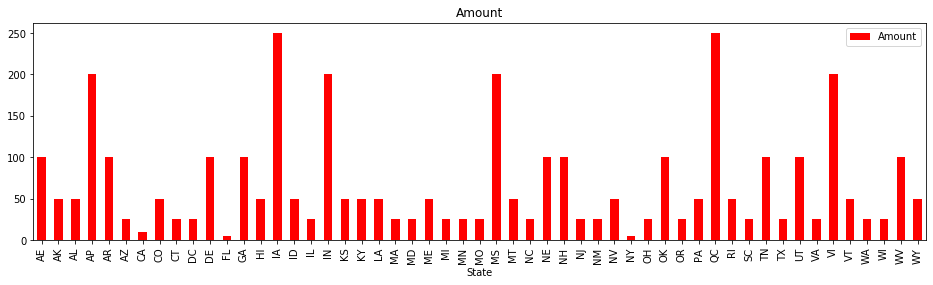

In [30]:

min_df.plot(kind='bar',subplots=True, color='red',figsize=(16, 4)); plt.legend()